## 制限付きボルツマンマシン (Restricted Boltzmann Machine, RBM)

Geoffrey Hintonは、Andrew Ngとのインタビューで、研究者としての人生で最も誇りに思う成果として、RBMを利用した研究を挙げています。HintonがRBMを利用して明らかにしたのは、ディープニューラルネットワークの初期化がどれほど重要であるかということです。初期化の方法が、ディープニューラルネットワークの効果的な学習の成否を左右するからです。

RBMは、データの潜在因子を確率的に取得することができる生成モデル（Generative Model）です。ここでは、RBMがどのように動作するのかを詳しく見ていきます。

### 前提知識
RBMを理解するためには、以下の内容に精通していることをお勧めします。
- 最大尤度法
- 勾配降下法
- リジェクションサンプリング
- モンテカルロ・マルコフ連鎖

### 確率分布がわかると…
RBMは、生成モデルとして確率密度関数をモデリングすることを目標としています。確率密度関数を正確に知るということは、あらゆる事象が発生する確率を正確に知ることを意味します。

たとえば、顔を描く機械があると仮定します。機械が顔のパーツ（例えば鼻）の確率分布を知っていると、確率の高いパーツ（例えば三角形の鼻）を選んで描く可能性が高くなります。このように、さまざまなパーツの確率分布を知ることで、現実的な組み合わせの顔を生成することができます。



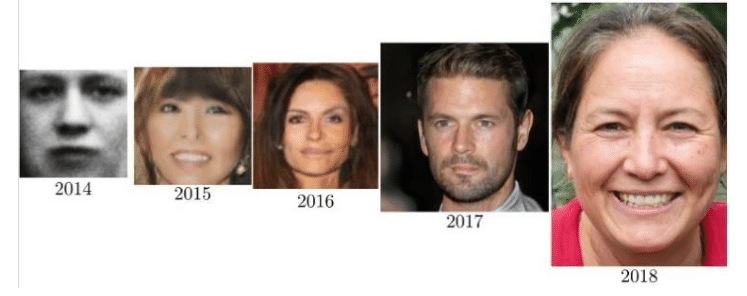

GANによって生成された顔画像の進化

### 確率密度関数を学習するためのモデル設計
#### Boltzmann Machine
ボルツマンマシンは、確率分布を学習するために設計されたモデルです。図3の左側に示されているのがBoltzmann Machineで、右側に示されているのがRestricted Boltzmann Machine (RBM)です。

Boltzmann Machineは、「観察できない要素まで含めて学習することで、確率分布をより正確に把握できるのではないか」という前提のもとで設計されています。Boltzmann Machineには、hidden unit（隠れユニット）とvisible unit（可視ユニット）があり、hidden unitは観察できない特性を含むことで、より正確な学習を目指しています。

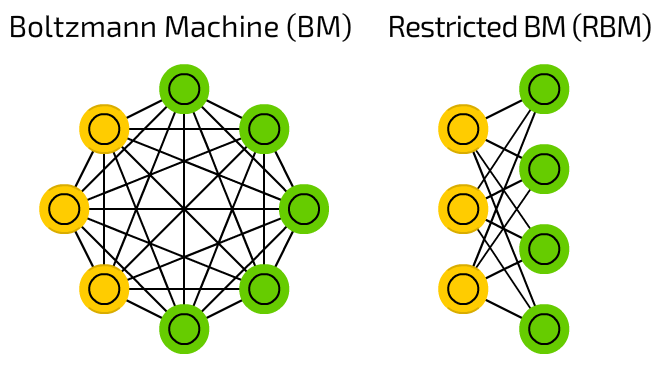


Boltzmann Machine과 Restricted Boltzmann Machine

#### Restricted Boltzmann Machine (RBM)
RBMは、Boltzmann Machineから派生したモデルで、visible unitとhidden unitの内部的な接続がなく、visible unitとhidden unitの間の接続のみが残されています。これにより、RBMは計算の複雑さを軽減し、学習の効率を向上させることができます。

RBMの特徴は、Feed-Forward Neural Network (FFNN) のように学習できることです。RBMは、FFNNに似たforward propagation（順伝播）を行い、hidden unitの状態を決定し、その状態からback propagation（逆伝播）を行ってvisible unitの状態を再度決定します。

### まとめ
RBMは、データの潜在構造を確率的にモデル化し、より現実的なデータ生成を可能にする強力なツールです。RBMを利用したHintonの研究は、ディープラーニングにおける初期化の重要性を示し、生成モデルの可能性を広げました。

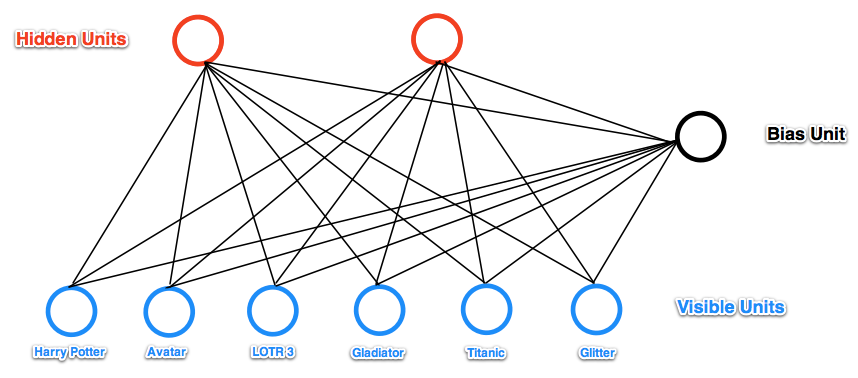

RBMのより具体的な構造

### RBMの構造と特性

RBM（制限ボルツマンマシン）が学習するということは、確率分布を学習することを意味します。RBMがうまく学習していることを数式で表現するには、RBMの構造とその学習メカニズムを理解する必要があります。

#### RBMの構造

RBMの構造は次の通りです：

- **Visible Layer（可視層）**: 入力データを受け入れる層です。各入力データは複数の状態（state）を持つことができ、これを今後 $ v $ と表記します。

- **Hidden Layer（隠れ層）**: 隠れたデータがサンプリングされる層です。この隠れたデータも複数の状態を持つことができ、これを $ h $ と表記します。

- **Weight Matrix（重み行列、$ W $）**: Visible LayerとHidden Layerをつなぐ行列です。

- **Bias for Visible Layer（可視層のバイアス、$ b $）**: Visible Unitの内在的な特性を設定する役割を果たします。例えば、あるVisible Unitがほとんど常に活性化されている場合、そのユニットのバイアスは高くなります。

- **Bias for Hidden Layer（隠れ層のバイアス、$ c $）**: Hidden Unitの内在的な特性を設定します。Visible Layerのバイアスと似た役割を果たします。

これらの要素はすべてベクトルまたは行列で表すことができます：

- $ v, b \in \mathbb{R}^{d \times 1} $
- $ h, c \in \mathbb{R}^{n \times 1} $
- $ W \in \mathbb{R}^{n \times d} $

#### エネルギー（Energy）: 状態を反映する数値

RBMの学習性能を評価するためには、他のモデルを構成する場合と同様にコスト関数を定義する必要があります。RBMでは、このコスト関数は「エネルギー（Energy）」という概念を使って定義されます。エネルギーは特定の状態の安定性を示し、それを通して確率分布と関連付けることができます。

エネルギーに基づく確率の定義式は次のようになります：

$$
p(x) = \frac{\exp(-E(x))}{Z}
$$

ここで、$ Z $ はすべての可能な状態のエネルギーを合計した正規化定数です。

RBMでは、Visible UnitとHidden Unitの状態に応じてエネルギーが決定されます。Visible Unitsの確率分布は次のように定義されます：

$$
p(v) = \sum_h p(v, h) = \sum_h \frac{\exp(-E(v, h))}{Z}
$$

### フリーエネルギーの定義と学習過程

RBMの学習過程では、エネルギー関数の代わりにフリーエネルギー（Free Energy）が使われます：

$$
F(v) = -\log \sum_h \exp(-E(v, h))
$$

RBMのエネルギー関数は次のように定義されます：

$$
E(v, h) = -b'v - c'h - h'Wv
$$

エネルギーが低いほど状態は安定していることを意味します。RBMはこのエネルギーを最小化するように学習し、データを効果的にモデル化します。

### 二値状態を持つRBM

ほとんどのRBMの研究では、Visible UnitとHidden Unitが0または1の状態のみを持つ二値状態のRBMが扱われます。このようなモデルはBernoulli RBMと呼ばれ、状態が離散的な場合に非常に有用です。

RBMは、Visible LayerとHidden Layer間の確率を計算してデータをサンプリングします。特定のHidden Unitが1に活性化される確率は次のように計算されます：

$$
p(h_i = 1 | v) = \sigma(c_i + W_iv)
$$

ここで、$\sigma(\cdot)$ はシグモイド関数です。同様の方法で、Visible Unitの条件付き確率も計算することができます。

### まとめ

RBMは学習を通じて入力データの確率分布を学習し、それを通じてデータの内在的な構造を把握します。エネルギーとフリーエネルギーの概念を利用して、RBMの学習が適切に行われているかを評価することができ、この過程でさまざまな確率計算が重要な役割を果たします。


### RBMの学習過程

#### RBM学習の全体像
RBMの学習とは、確率分布を学習することです。この学習プロセスは、サンプリングを通じて間接的に確認できます。もしRBMが与えられたデータをうまく学習している場合、サンプリングによって得られるVisible Layerのデータは元のデータとほぼ同じになるはずです。

![RBMの学習のイメージ図](insert appropriate image link here)

このプロセスを数式的に導出してみましょう。

#### 勾配降下法を利用したRBMの学習
RBMの学習は、サンプリングを通じて得られるVisible Layerのデータが元のデータとほぼ同じになることを目的としています。これは任意の学習目標ではなく、数学的に確認できるものです。

RBMのパラメータ（$b$, $c$, $W$）が正しく学習されている場合、現在のデータに対して得られるすべての尤度の積が最大になります。したがって、学習のプロセスでは、得られたデータに基づいて尤度を最大化するようにパラメータを調整します。

学習の初期段階では、パラメータが最適化されていないため、尤度を最大化するために勾配上昇法（Gradient Ascent）を用います。しかし、一般的にはモデル学習では勾配降下法（Gradient Descent）を使用するため、負の尤度を最小化する方向で計算します。通常、直接尤度ではなく対数尤度を使用するため、負の対数尤度を最小化する計算を行います。

RBMのパラメータを $ \theta $ とし、負の対数尤度は次のように計算されます：

$$
- \frac{\partial}{\partial \theta} \log p(v) = - \frac{\partial}{\partial \theta} \log \left(\frac{\exp(-F(v))}{Z}\right)
$$

これを展開すると：

$$
= \frac{\partial}{\partial \theta} F(v) + \frac{\partial}{\partial \theta} \log \left(\sum_{\tilde{v}} \exp(-F(\tilde{v}))\right)
$$

ここで、$\tilde{v}$ はRBMモデルによって生成されたVisible Unitのサンプルです。このように導出された結果を利用して、RBMの学習過程は次のように展開されます：

$$
\approx \frac{\partial}{\partial \theta} F(v) - \frac{1}{|N|} \sum_{\tilde{v} \in N} \frac{\partial F(\tilde{v})}{\partial \theta}
$$

この最後の式からわかるように、最初のVisible Layerのデータ $v$ のフリーエネルギーと、サンプリングを通じて得られたVisible Layerのデータ $\tilde{v}$ のフリーエネルギーの差がLossとして利用されます。

#### RBMにおける学習とは：コントラスト・ダイバージェンスの削減
コントラスト・ダイバージェンス（Contrastive Divergence, CD）とは、Visible Layerにデータを与え、Hidden Layerのノードの値をサンプリングし、その後再びVisible Layerのデータを予測させる過程で、最初に与えたVisible Layerのデータと再取得したVisible Layerのデータとの違いを測る指標です。

Hinton教授は、Visible Layerのデータを1回だけサンプリングしてLossを計算しても、RBMの学習には大きな問題がないことを実験的に確認しました。

したがって、元のデータから得られるVisible Layerのフリーエネルギーと生成されたデータから得られるVisible Layerのフリーエネルギーの差が小さいほど、学習がうまく進んでいると考えられます。この差がLossとして次のように表されます：

$$
\text{loss} = F(v) - F(v^{(1)})
$$

#### サンプリングのプロセス
RBMでのVisible LayerやHidden Layerのデータはどのようにサンプリングされるのでしょうか？Gibbsサンプリングは、マルコフ連鎖モンテカルロ（MCMC）の一種であり、RBMのサンプリングはこのGibbsサンプリングによって実現されます。

RBMの学習とサンプリングプロセスを理解することで、RBMがどのようにして確率分布を学習し、Visible Layerのデータを再構築するのかを理解できるようになります。


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 128502538.31it/s]

Extracting ./MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 37158188.29it/s]


Extracting ./MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 61072866.45it/s]


Extracting ./MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 7151099.39it/s]

Extracting ./MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw



-4.533818307970124
-1.1797651604040345
0.8734912668972381
1.8478890360037148
2.297823517561467
2.651732910416528
2.8102074238791395
2.918528575124517
3.0054235397371403
3.0531086545509063


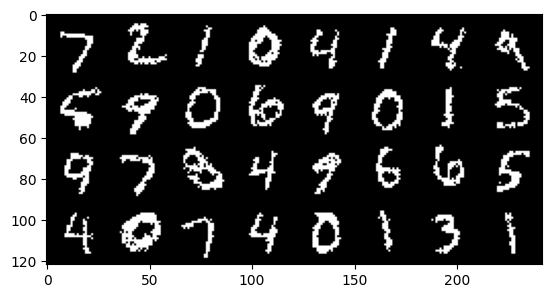

In [ ]:
import numpy as np
import torch
import torch.utils.data
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torchvision import datasets, transforms
from torchvision.utils import make_grid

# %% グラフを表示および保存するための関数

import matplotlib.pyplot as plt

def show_and_save(file_name, img):
    """
    画像を表示し、保存する関数
    """
    npimg = np.transpose(img.numpy(), (1, 2, 0))
    file_path = f"./{file_name}.png"
    plt.imshow(npimg)
    plt.imsave(file_path, npimg)


# %% RBM モジュールの作成
class RBM(nn.Module):
    def __init__(self, n_vis=784, n_hin=500, k=5):
        super(RBM, self).__init__()
        # 他の初期化方法よりも、この方法が学習に適している
        self.W = nn.Parameter(torch.randn(n_hin, n_vis) * 1e-2)
        self.v_bias = nn.Parameter(torch.zeros(n_vis))  # バイアスを0で初期化
        self.h_bias = nn.Parameter(torch.zeros(n_hin))  # バイアスを0で初期化

        self.k = k  # Contrastive Divergenceの繰り返し回数

    def sample_from_p(self, p):
        # Gibbs Samplingの過程
        # 確率を計算した後、ユニフォーム分布から得た値より大きければ1、そうでなければ-1を出力
        # ReLU関数を使用して-1の値をすべて0にする
        p_ = p - Variable(torch.rand(p.size()))
        p_sign = torch.sign(p_)
        return F.relu(p_sign)

    def v_to_h(self, v):
        # 与えられたvisible unitからhidden unitをサンプリングする過程
        p_h = torch.sigmoid(F.linear(v, self.W, self.h_bias))
        sample_h = self.sample_from_p(p_h)
        return p_h, sample_h

    def h_to_v(self, h):
        # hidden unitのサンプルからvisible unitを再構築する過程
        p_v = torch.sigmoid(F.linear(h, self.W.t(), self.v_bias))
        sample_v = self.sample_from_p(p_v)
        return p_v, sample_v

    def forward(self, v):
        # RBMのforwardはvisible -> hidden -> visibleの流れで
        # hidden unitとvisible unitをサンプリングする
        pre_h1, h1 = self.v_to_h(v)

        h_ = h1
        for _ in range(self.k):  # Contrastive Divergenceをk回繰り返す
            pre_v_, v_ = self.h_to_v(h_)
            pre_h_, h_ = self.v_to_h(v_)

        # vは入力データ、v_はサンプリングされたhidden unitから再構築されたデータ
        return v, v_

    def free_energy(self, v):
        # Free Energyの計算
        vbias_term = v.mv(self.v_bias)  # mv: 行列とベクトルの積
        wx_b = F.linear(v, self.W, self.h_bias)

        temp = torch.log(torch.exp(wx_b) + 1)
        hidden_term = torch.sum(temp, dim=1)

        return (-hidden_term - vbias_term).mean()


# %% データセットの読み込み: MNISTを使用
batch_size = 64
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./MNIST_data', train=True, download=True,
                   transform=transforms.Compose([transforms.ToTensor()])),
    batch_size=batch_size)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./MNIST_data', train=False,
                   transform=transforms.Compose([transforms.ToTensor()])),
    batch_size=batch_size)


# %% RBMモデルと最適化関数の設定

rbm = RBM(k=1)  # CDのkを1に設定
# visible unitを1回だけサンプリングし、元のvisible unitとの差を評価してlossとする
train_op = optim.Adam(rbm.parameters(), 0.005)  # Optimizerは何でも良い

# %% RBMの学習

for epoch in range(10):
    loss_ = []
    for _, (data, target) in enumerate(train_loader):  # 確率的勾配降下法を実行
        data = Variable(data.view(-1, 784))
        sample_data = data.bernoulli()  # RBMの入力は0または1でなければならない

        v, v1 = rbm(sample_data)
        loss = rbm.free_energy(v) - rbm.free_energy(v1)
        loss_.append(loss.data.item())
        train_op.zero_grad()
        loss.backward()  # RBMのBackpropagationは入力とサンプリングされたデータ間の差を最小化する
        train_op.step()

    print(np.mean(loss_))

# %% テストデータから元のデータとサンプリングされたデータを比較

testset = datasets.MNIST('./MNIST_data', train=False, transform=transforms.Compose([
    transforms.ToTensor()
]))

sample_data = testset.data[:32, :].view(-1, 784)  # 32個のデータを取得
sample_data = sample_data.type(torch.FloatTensor) / 255.

v, v1 = rbm(sample_data)
show_and_save("real_testdata", make_grid(v.view(32, 1, 28, 28).data))
show_and_save("generated_testdata", make_grid(v1.view(32, 1, 28, 28).data))


# 確率密度関数を学習するための機械設計

## Boltzmann Machine

Boltzmann Machineはこのように確率分布（正確には確率質量関数または確率密度関数）を学習するために作られたと言える。

Boltzmann Machineが仮定するのは、「我々が見ているものだけでなく、見えない要素も含めて学習することで、確率分布をより正確に知ることができるのではないか？」ということである。

![Boltzmann MachineとRestricted Boltzmann Machine](figure3.png)  
図 3 の左に見えるのが Boltzmann Machine で、右に見えるのが Restricted Boltzmann Machine である。





まず Boltzmann Machine について説明すると、円形のものが可能なイベントに対する状態である。

例えば、この Boltzmann Machine が顔の形に関する確率密度関数を学習するために作られており、各円形は顔の特定の部位に対する状態を示しているとする。

その中の一つの円形が鼻に関するもので、状態 0、1、2 が円形、三角形、四角形の鼻に対する状態をそれぞれ表していると言えるだろう。

Boltzmann Machine で注目すべき点は、黄色と緑色で表された特性であり、それぞれが hidden unit と visible unit の存在を示している。

hidden unit が示すのは、我々が見えない何らかの特性が存在することを示唆し、こうした見えない因子も学習できるならば、より正確な確率分布を学習できると仮定している。

## Restricted Boltzmann Machine

では、私たちの関心事である Restricted Boltzmann Machine (RBM) とは何か？

RBM は図 3 の右側に示されており、RBM は Boltzmann Machine から派生したもので、visible unit と hidden unit の間に内部的な接続がなく、visible unit と hidden unit 間の接続だけが残っている形である。

このように RBM を構成するのには、いくつかの実用的な理由がある。

まず、visible と hidden layer のノード間に内部的な接続がなくなったのは、事象間の独立性を仮定し、確率分布の結合を容易に表現するためである。

また、visible layer と hidden layer のみを接続することで、visible layer のデータが与えられた時に hidden layer のデータを計算したり、hidden layer のデータが与えられた時に visible layer のデータを計算したりする「条件付き確率」を計算できるようにするためである。

すなわち、

$$
p(h, v)
$$

は計算が難しいが、

$$
p(h|v)
$$

や

$$
p(v|h)
$$

は比較的計算が容易であるためである。

このような理由から、Boltzmann Machine の計算が非常に複雑になるため、それを簡単にするためにより厳密でないモデルが構成されたと言える。

Boltzmann Machine から RBM のような形が構成されることで生じる特異点は、RBM が Feed-Forward Neural Network (FFNN) のように学習する点である。

後でさらに説明するが、RBM の動作方式は FFNN と似ており、forward propagation を通じて hidden unit の状態を決定し、再び hidden unit の状態から back propagation を行って visible unit の状態を再決定する。

## RBM の構造と特性

前述のように、RBM が何かを学習するということは、確率分布を習得することである。

それでは、RBM が学習をうまく行っていることをどう数式で表現できるのかを見ていこう。

### RBM の構造

![RBMの具体的な構造](figure4.png)  
図 4 を見ると、RBM の構造は visible layer と hidden layer、そしてこれら二つの layer を結ぶ weight matrix で構成されていることがわかる。



さらに、visible layer と hidden layer にはそれぞれ bias term が含まれている。

それぞれについて説明すると以下のようになる。

- **visible layer**: 入力データが入る場所。各入力データは様々な状態（state）を持つことができる。以下では $v$ と表記する。
- **hidden layer**: 隠れデータがサンプリングされる場所。各隠れデータは様々な状態を持つことができる。以下では $h$ と表記する。
- **weight matrix**: visible layer と hidden layer を結ぶ装置。元々の Boltzmann Machine から派生した概念。以下では $W$ と表記する。
- **bias for visible layer**: 入力データの内在的な特性を設定する部分。後述するが、もしある visible unit がほとんど常に 1 の場合、その unit の bias は高いほど良い。以下では $b$ と表記する。
- **bias for hidden layer**: 隠れデータの内在的特性を設定する部分。上記の visible layer の bias と似た役割を持つ。以下では $c$ と表記する。

なお、$v$、$h$、$b$、$c$ は全てベクトルであり、$W$ は行列である。

visible layer のノード数が $d$ 個、hidden layer のノード数が $n$ 個の場合、それぞれの次元は次のようになる。

$$
v, b \in \mathbb{R}^{d \times 1} \tag{1}
$$

$$
h, c \in \mathbb{R}^{n \times 1} \tag{2}
$$

$$
W \in \mathbb{R}^{n \times d} \tag{3}
$$

このような構造を持つ RBM において、「学習をうまく行っている」という状態をどう表現できるかを引き続き考察していこう。
